1. Perform Exploratory data analysis. (20)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('cancer.csv')
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


A) ○-- What can you conclude from methods of central tendency and deviation of the variables?Answer:Measure of central tendency and deviations are illustrated by dataset summary below:-

In [3]:
#In data describe function, we can have mean(measure of central tendency)& std,range& interquartileRange as deviation variables.
data.describe() 

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


B)--○ Are there any correlated variables? Answer: there are no highly correlated variables in this dataset.The heatmap below illustrates the correlation between the variables

In [4]:
correlation=data.corr()
correlation

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092623,-0.066548,0.064351
Year,0.092623,1.000000,-0.003277,-0.004076
Auxillary nodes,-0.066548,-0.003277,1.000000,0.286191
Survival,0.064351,-0.004076,0.286191,1.000000


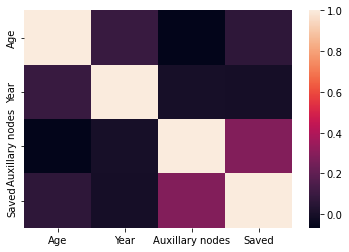

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt   # No highly correlated variables in this data set.
sns.heatmap(correlation)
plt.show()

C)--○ Interpret the skewness of the variables

<AxesSubplot:>

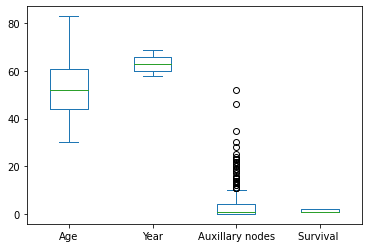

In [5]:
data.plot.box() # The feature "Auxillary nodes"has outliers.

<AxesSubplot:>

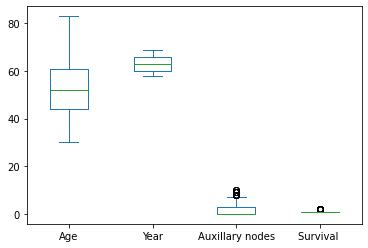

In [6]:
# The feature "Auxillary nodes"has outliers.
# Removing Outliers
# Max = 75% + 1.5* (75% - 25%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('cancer.csv')
maximum = 4 + 1.5*(4 - 0)
new_data = data[data["Auxillary nodes"]<= maximum]
new_data.plot.box()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival '}>]], dtype=object)

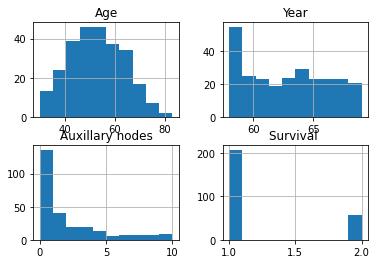

In [7]:
new_data.hist() # The feature "Auxilary nodes" has skewness.

<AxesSubplot:>

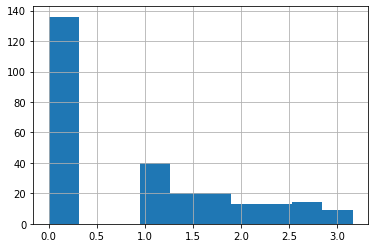

In [8]:
# Removing Skewness
# Removing the skewness of "Auxillary nodes" by sqrt.
final_data = new_data["Auxillary nodes"]**(0.5)
final_data.hist()

2. Develop Supervised learning models. (50)

Scikit-learn (sklearn) library imports:

- train_test_split --> splitting data into training and testing datasets
- KFold --> cross-validation (k - number of folds)
- GridSearchCV --> hyperparmaters tuning
- roc_auc_score --> Area under the curve for ROC
- plot_roc_curve --> Plotting ROC curve
- SVC --> Support Vector Machine
- MLPClassifier --> Multiple layer perceptron (Neural Network)
- classification_report --> performance metrics for classification
- confusion_matrix --> predicted vs actual values
- ConfusionMatrixDisplay --> visualization for confusion matrix

In [9]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [10]:
# Import data
import pandas as pd
data = pd.read_csv("cancer.csv")
data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [11]:
# Import data
import pandas as pd
data = pd.read_csv("cancer.csv")

# Create features/inputs
X = data.drop(columns = ["Survival "])

# Create the output/class
y = data["Survival "]

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)

data

,Age,Year,Auxillary nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


2A)__○ Logistic Regression

              precision    recall  f1-score   support

           1       0.82      0.94      0.88        97
           2       0.45      0.20      0.28        25

    accuracy                           0.79       122
   macro avg       0.64      0.57      0.58       122
weighted avg       0.74      0.79      0.75       122



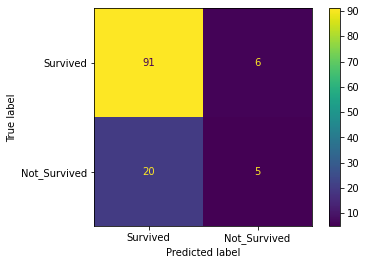

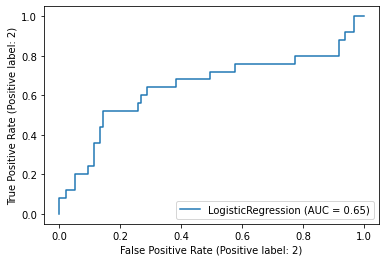

In [12]:
# Logistic Regression

# Defining and training the model
clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Evaluating the model 
clf.score(X_test, y_test)

# Making predictions
y_pred = clf.predict(X_test)

# Creating the labels
labels = ["Survived", "Not_Survived"]

# Developing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = clf.classes_))

# Plotting ROC curve
plot_roc_curve(clf, X_test, y_test) 
plt.show()

2B)__○ Random Forest

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        97
           2       0.44      0.28      0.34        25

    accuracy                           0.78       122
   macro avg       0.63      0.59      0.60       122
weighted avg       0.75      0.78      0.76       122



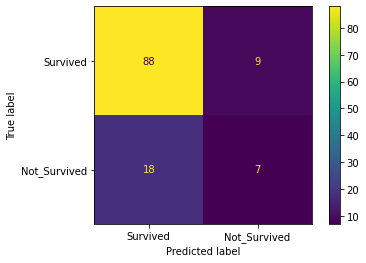

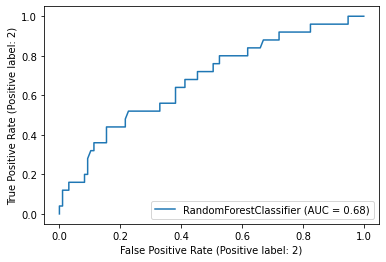

In [27]:
# Developing and fitting the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

# Making predictions
rf_pred = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, rf_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels = labels)
disp.plot()
print(classification_report(y_test, rf_pred, labels = clf.classes_))

plot_roc_curve(rf, X_test, y_test) 
plt.show()

2C)__○ Support Vector Machine

              precision    recall  f1-score   support

           1       0.80      0.97      0.88        97
           2       0.40      0.08      0.13        25

    accuracy                           0.79       122
   macro avg       0.60      0.52      0.51       122
weighted avg       0.72      0.79      0.73       122



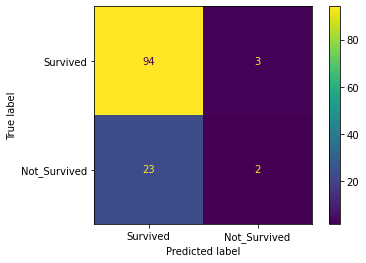

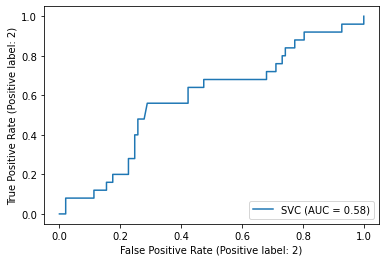

In [28]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
plot_roc_curve(svm, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.82      0.92      0.86        97
           2       0.38      0.20      0.26        25

    accuracy                           0.77       122
   macro avg       0.60      0.56      0.56       122
weighted avg       0.73      0.77      0.74       122



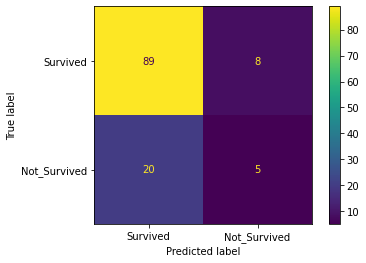

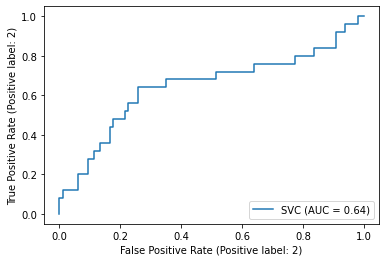

In [29]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "linear", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
plot_roc_curve(svm, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        97
           2       0.38      0.24      0.29        25

    accuracy                           0.76       122
   macro avg       0.60      0.57      0.57       122
weighted avg       0.73      0.76      0.74       122



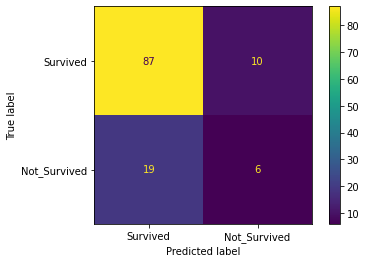

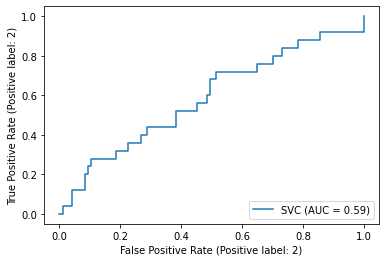

In [30]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "poly", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
plot_roc_curve(svm, X_test, y_test) 
plt.show()

              precision    recall  f1-score   support

           1       0.80      1.00      0.89        97
           2       0.00      0.00      0.00        25

    accuracy                           0.80       122
   macro avg       0.40      0.50      0.44       122
weighted avg       0.63      0.80      0.70       122



C:\Users\yibel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yibel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yibel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


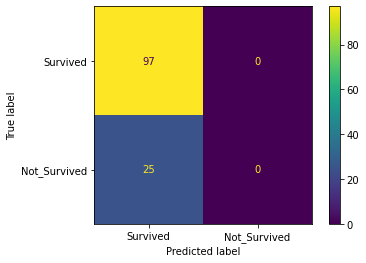

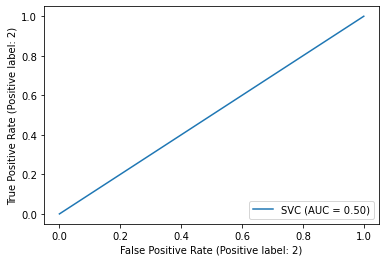

In [31]:
# Developing and fitting the Support Vector Machine
svm = SVC(random_state = 0, kernel = "sigmoid", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)
disp.plot()
print(classification_report(y_test, svm_pred, labels = clf.classes_))
plot_roc_curve(svm, X_test, y_test) 
plt.show()

2D)__○ Neural Network

              precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           2       0.35      0.28      0.31        25

    accuracy                           0.75       122
   macro avg       0.59      0.57      0.58       122
weighted avg       0.73      0.75      0.73       122



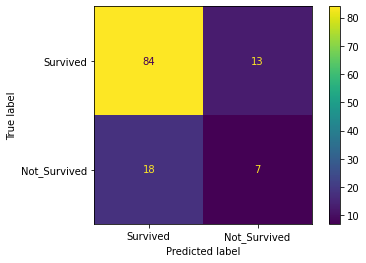

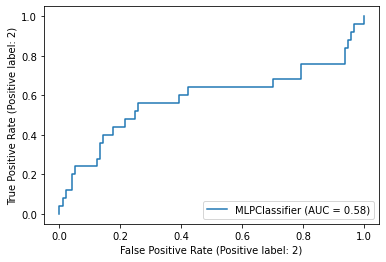

In [32]:
# Developing and fitting the Neural Network

nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

nn_pred = nn.predict(X_test)

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)
disp.plot()
print(classification_report(y_test, nn_pred, labels = clf.classes_))
plot_roc_curve(nn, X_test, y_test) 
plt.show()

****Compare the 4 methods based on the performance metrics and identify the best
model for this problem.
- Use 10 - fold cross validation.
- Use GridSearchCV for searching through hyper parameters

In [16]:
# Use 10 - fold cross validation
# Implement k-fold(10-fold) cross validation

# Specify the number of splits - 10
kf = KFold(n_splits=10)

iteration = 1
for train_indices, test_indices in kf.split(X_train):
    clf.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
    print("Accuracy for iteration "+ str(iteration) + " is " + str(clf.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
    iteration += 1

Accuracy for iteration 1 is 0.6842105263157895
Accuracy for iteration 2 is 0.7894736842105263
Accuracy for iteration 3 is 0.631578947368421
Accuracy for iteration 4 is 0.7222222222222222
Accuracy for iteration 5 is 0.6666666666666666
Accuracy for iteration 6 is 0.8333333333333334
Accuracy for iteration 7 is 0.8333333333333334
Accuracy for iteration 8 is 0.7777777777777778
Accuracy for iteration 9 is 0.6666666666666666
Accuracy for iteration 10 is 0.6666666666666666


In [24]:
# Averaging cross validation results from iteration 1:10
# The accuracy test for the model logistic regression is comparatively closer to the average accuracy,Somewhat best
def cal_average(num):
    sum_num = 0
    for i in num:
        sum_num = sum_num + i           

    avg = sum_num / len(num)
    return avg

print("The average is", cal_average([0.68,0.79,0.63,0.72,0.67,0.83,0.83,0.78,0.67,0.67]))

The average is 0.7270000000000001


In [17]:
# Use GridSearchCV for searching through hyper parameters
# Implement grid search for parameter tuning

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

3. Evaluate if the algorithms are overfitting? (10)

In [25]:
# Averaging cross validation results from iteration 1:10 above.
# Average cross validation is:0.727
# If the accuracy testing from the above is below the average it is underfitting
# If the accuracy testing from the above is over the average accuracy it is overfitting
# All of the accuracy testings of the models are below the average,so all are underfittings.
# Of all models accuracy test, logistic regression is comparatively best of all.
def cal_average(num):
    sum_num = 0
    for i in num:
        sum_num = sum_num + i           

    avg = sum_num / len(num)
    return avg

print("The average is", cal_average([0.68,0.79,0.63,0.72,0.67,0.83,0.83,0.78,0.67,0.67]))

The average is 0.7270000000000001


4. Develop a function which can implement machine learning. (20)
def machine_learning (data, algorithm):
…..
…..
plot ROC curve
return performance metrics
Function call: machine_learning (data, neural_network)

(<sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x2ce21cb7a00>,
 <sklearn.metrics._plot.roc_curve.RocCurveDisplay at 0x2ce222c4970>)

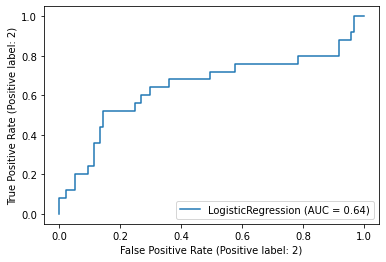

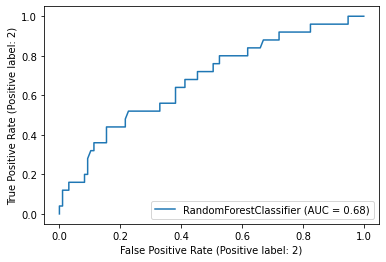

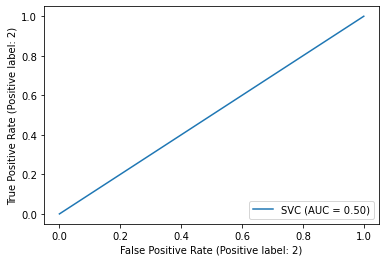

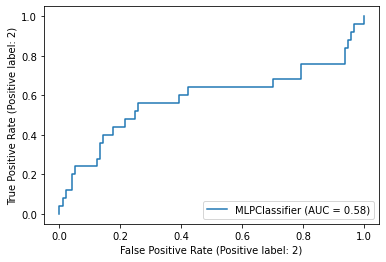

In [36]:
def machine_learning (data, algorithm):
    
    performance_metrics=plot_roc_curve(clf, X_test, y_test),plot_roc_curve(rf, X_test, y_test),plot_roc_curve(svm, X_test, y_test),plot_roc_curve(nn, X_test, y_test)
    
    return performance_metrics
machine_learning (data, nn) #Function call
